In [1]:
!pip install pycaret

     ---------------------------------------- 0.0/160.5 kB ? eta -:--:--
     -------------- ------------------------ 61.4/160.5 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 160.5/160.5 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/50.7 kB ? eta -:--:--
     ---------------------------------------- 50.7/50.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/485.9 kB ? eta -:--:--
   --------------------------------------- 485.9/485.9 kB 29.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/106.8 kB ? eta -:--:--
   ---------------------------------------- 106.8/106.8 kB ? eta 0:00:00
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ---------------------------------------- 81.9/81.9 kB ? eta 0:00:00
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [6]:
import numpy as np
import pandas as pd
import joblib
import pickle
from pycaret.regression import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('review_add_size.csv')
df.head()

,code,Title,Gender,Height,Weight,user_size,estimated_review,comment_review,fit_big,fit_small,...,sh_big,sh_small,ch_big,ch_small,sl_big,sl_small,full_length,width_length,chest_length,sleeve_length
0,3427773,어반디타입(URBANDTYPE) UB 베이직 니트 후드 집업_페일블루_KN121,0,155,60,2,2.0,타임 세일로 저렴하게 구매했어요! 우선 엄청 얇은 니트입니다 탄탄한 니트 절대 아니...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,67.0,56.0,60.0,59.0
1,3427773,어반디타입(URBANDTYPE) UB 베이직 니트 후드 집업_페일블루_KN121,0,168,65,1,1.0,촉감도 부들부들하고 배송도 빠르고 실제로 보니 색상도 예뻐요,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,54.0,58.0,57.0
2,3427773,어반디타입(URBANDTYPE) UB 베이직 니트 후드 집업_페일블루_KN121,1,185,80,3,1.0,주머니 없는 게 아쉽긴 한데 색감도 좋고 너무 마음에 들어요 저렴한 가격에 잘 구매...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,69.0,58.0,62.0,61.0
3,3427773,어반디타입(URBANDTYPE) UB 베이직 니트 후드 집업_페일블루_KN121,1,177,68,2,1.0,옷 무겁지 않아서 좋고 초여름 초가을에도 입을 수 있을 듯 색감 밝은 편이라 좋네요...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,67.0,56.0,60.0,59.0
4,3427773,어반디타입(URBANDTYPE) UB 베이직 니트 후드 집업_페일블루_KN121,1,175,71,3,1.0,다 좋습니다 한 가지 단점은 지퍼를 올리기가 힘듭니다 세일한 가격에 사서 그냥 입겠습니다,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,69.0,58.0,62.0,61.0


In [8]:
df = df.drop(['Title', 'comment_review','code', 'estimated_review'], axis=1)

In [9]:
df_filled = df.fillna(0)
df_filled.head()

,Gender,Height,Weight,user_size,fit_big,fit_small,ln_big,ln_small,sh_big,sh_small,ch_big,ch_small,sl_big,sl_small,full_length,width_length,chest_length,sleeve_length
0,0,155,60,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,56.0,60.0,59.0
1,0,168,65,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,54.0,58.0,57.0
2,1,185,80,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,58.0,62.0,61.0
3,1,177,68,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,56.0,60.0,59.0
4,1,175,71,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,58.0,62.0,61.0


In [10]:
def preprocessing(df):
  # Make train set
    df_chongjang_big    = df.loc[df['ln_big'] == 1, ['Height','Weight','Gender', 'full_length']]
    df_chongjang_small  = df.loc[df['ln_small'] == 1, ['Height','Weight','Gender', 'full_length']]
    df_chongjang_soso   = df.loc[(df['ln_big'] == 0) & (df['ln_small'] == 0), ['Height','Weight','Gender', 'full_length']]

    df_shoulder_big     = df.loc[df['sh_big'] == 1, ['Height','Weight','Gender', 'width_length']]
    df_shoulder_small   = df.loc[df['sh_small'] == 1, ['Height','Weight','Gender', 'width_length']]
    df_shoulder_soso    = df.loc[(df['sh_big'] == 0) & (df['sh_small'] == 0), ['Height','Weight','Gender', 'width_length']]

    df_chest_big        = df.loc[df['ch_big'] == 1, ['Height','Weight','Gender', 'chest_length']]
    df_chest_small      = df.loc[df['ch_small'] == 1, ['Height','Weight','Gender', 'chest_length']]
    df_chest_soso       = df.loc[(df['ch_big'] == 0 )& (df['ch_small'] == 0), ['Height','Weight','Gender', 'chest_length']]

    df_arm_big          = df.loc[df['sl_big'] == 1, ['Height','Weight','Gender','sleeve_length']]
    df_arm_small        = df.loc[df['sl_small'] == 1, ['Height','Weight','Gender','sleeve_length']]
    df_arm_soso         = df.loc[(df['sl_big'] == 0) & (df['sl_small'] == 0), ['Height','Weight','Gender','sleeve_length']]

    # Drop Null value
    df_chongjang_big.dropna(axis = 0,inplace = True)
    df_chongjang_small.dropna(axis = 0,inplace = True)
    df_chongjang_soso.dropna(axis = 0,inplace = True)

    df_arm_big.dropna(axis = 0,inplace = True)
    df_arm_small.dropna(axis = 0,inplace = True)
    df_arm_soso.dropna(axis = 0,inplace = True)

    df_chest_big.dropna(axis = 0,inplace = True)
    df_chest_small.dropna(axis = 0,inplace = True)
    df_chest_soso.dropna(axis = 0,inplace = True)

    df_shoulder_big.dropna(axis = 0,inplace = True)
    df_shoulder_small.dropna(axis = 0,inplace = True)
    df_shoulder_soso.dropna(axis = 0,inplace = True)

    # train df list
    hood_chongjang_train_lst = [df_chongjang_big, df_chongjang_small, df_chongjang_soso]
    hood_shoulder_train_lst = [df_shoulder_big, df_shoulder_small, df_shoulder_soso]
    hood_chest_train_lst = [df_chest_big, df_chest_small, df_chest_soso]
    hood_arm_train_lst = [df_arm_big, df_arm_small, df_arm_soso]

    return hood_chongjang_train_lst, hood_shoulder_train_lst, hood_chest_train_lst, hood_arm_train_lst

In [11]:
def pycaret(hood_chongjang_train_lst, hood_shoulder_train_lst, hood_chest_train_lst, hood_arm_train_lst):
    # 총장
    for i in range(3):
        print("hood_chongjang_train_lst[{}]".format(i))
        s = setup(hood_chongjang_train_lst[i], target = 'full_length')
        set_config('seed', 2023)
        best = compare_models()
        plot_model(best)
        evaluate_model(best)

    # 어깨
    for i in range(3):
        print("hood_shoulder_train_lst[{}]".format(i))
        s = setup(hood_shoulder_train_lst[i], target = 'width_length')
        set_config('seed', 2023)
        best = compare_models()
        plot_model(best)
        evaluate_model(best)

    # 가슴
    for i in range(3):
        print("hood_chest_train_lst[{}]".format(i))
        s = setup(hood_chest_train_lst[i], target = 'chest_length')
        set_config('seed', 2023)
        best = compare_models()
        plot_model(best)
        evaluate_model(best)

    # 소매
    for i in range(3):
        print("hood_arm_train_lst[{}]".format(i))
        s = setup(hood_arm_train_lst[i], target = 'sleeve_length')
        set_config('seed', 2023)
        best = compare_models()
        plot_model(best)
        evaluate_model(best)

In [12]:
def lr_trainModel(lst, sizetype):
    for i in range(len(lst)):

        X = lst[i].iloc[:, :-1]
        y = lst[i].iloc[:, -1]

        xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

        lr = LinearRegression()
        lr.fit(xTrain, yTrain)
        prediction = lr.predict(xTest)

        if i % 3 == 1:
            print("MSE of small {}'s Model : {}".format(lst[i].columns[-1], mean_squared_error(yTest, prediction)))
            joblib.dump(lr, sizetype+'_small_lrModel.pkl')
        elif i % 3 == 2:
            print("MSE of soso {}'s Model : {}".format(lst[i].columns[-1], mean_squared_error(yTest, prediction)))
            joblib.dump(lr, sizetype+'_soso_lrModel.pkl')
        elif i % 3 == 0:
            print("MSE of big {}'s Model : {}".format(lst[i].columns[-1], mean_squared_error(yTest, prediction)))
            joblib.dump(lr, sizetype+'_big_lrModel.pkl')

    print("------------------", sizetype, "lr_trainModel:done")

In [13]:
def gbr_trainModel(lst, sizetype):
    for i in range(len(lst)):

        X = lst[i].iloc[:, :-1]
        y = lst[i].iloc[:, -1]

        xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

        gbr = GradientBoostingRegressor(random_state=42)

        parameters = {'learning_rate': [0.001, 0.01, 0.05, 0.1],
                      'subsample': [0.9, 0.5, 0.2, 0.1],
                      'n_estimators': [100, 200, 300, 500],
                      'max_depth': [2, 4, 6, 8]}

        grid_gbr = GridSearchCV(estimator=gbr,
                                param_grid=parameters,
                                cv=3,
                                n_jobs=-1)
        grid_gbr.fit(xTrain, yTrain)
        print("Best estimator", grid_gbr.best_estimator_)

        model = grid_gbr.best_estimator_
        model.fit(xTrain, yTrain)
        prediction = model.predict(xTest)
        print('score:{0:.4f}'.format(model.score(xTest, yTest)))

        if i % 3 == 1:
            print("MSE of small {}'s Model : {}".format(lst[i].columns[-1], mean_squared_error(yTest, prediction)))
            joblib.dump(model, sizetype+'_small_gbrModel.pkl')
        elif i % 3 == 2:
            print("MSE of soso {}'s Model : {}".format(lst[i].columns[-1], mean_squared_error(yTest, prediction)))
            joblib.dump(model, sizetype+'_soso_gbrModel.pkl')
        elif i % 3 == 0:
            print("MSE of big {}'s Model : {}".format(lst[i].columns[-1], mean_squared_error(yTest, prediction)))
            joblib.dump(model, sizetype+'_big_gbrModel.pkl')

    print("------------------", sizetype, "gbr_trainModel:done")

In [14]:
def decide_weight(lst,size_type):
    print('-------'+size_type+'-------')
    weight = []
    for i in range(len(lst)):

        X = lst[i].iloc[:, :-1]
        y = lst[i].iloc[:, -1]
        xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 42)


        load_model_big = joblib.load(size_type+'_big_lrModel.pkl') # big->lr
        prediction_big = load_model_big.predict(xTest)#a

        load_model_small = joblib.load(size_type+'_small_lrModel.pkl') # small->lr
        prediction_small = load_model_small.predict(xTest)#b

        load_model_soso = joblib.load(size_type+'_soso_gbrModel.pkl') # soso->gbr
        prediction_soso = load_model_soso.predict(xTest)#c

        mse_lst = []
        abc = []

        for a in np.arange(0, 1.0, 0.01):
            for b in np.arange(0, 1 - a, 0.01):
                c = 1 - (a + b)
                final_prediction = prediction_big * a + prediction_small* b + prediction_soso * c
                abc.append([a,b,c])
                mse_lst.append(mean_squared_error(yTest, final_prediction))

        if i % 3 == 0:
            print("big 일 때! 최소 MSE:{},가중치(big,small,soso):{}".format(mse_lst[np.argmin(mse_lst)],[round(x,2) for x in abc[np.argmin(mse_lst)]]))
            weight.append(abc[np.argmin(mse_lst)])

        elif i % 3 == 1:
            print("small 일 때! 최소 MSE:{},가중치(big,small,soso):{}".format(mse_lst[np.argmin(mse_lst)],[round(x,2) for x in abc[np.argmin(mse_lst)]]))
            weight.append(abc[np.argmin(mse_lst)])

        elif i % 3 == 2:
            print("soso 일 때! 최소 MSE:{},가중치(big,small,soso):{}".format(mse_lst[np.argmin(mse_lst)],[round(x,2) for x in abc[np.argmin(mse_lst)]]))
            weight.append(abc[np.argmin(mse_lst)])

    return weight

hood_chongjang_train_lst[0]


,Description,Value
0,Session id,7072
1,Target,full_length
2,Target type,Regression
3,Original data shape,"(929, 4)"
4,Transformed data shape,"(929, 4)"
5,Transformed train set shape,"(650, 4)"
6,Transformed test set shape,"(279, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,3.7978,22.3678,4.7034,0.3017,0.0660,0.0537,0.5400
lar,Least Angle Regression,3.7978,22.3678,4.7034,0.3017,0.0660,0.0537,0.0050
ridge,Ridge Regression,3.7966,22.3679,4.7034,0.3016,0.0660,0.0537,0.0050
br,Bayesian Ridge,3.7906,22.4520,4.7126,0.2987,0.0661,0.0537,0.0050
huber,Huber Regressor,3.7716,22.5286,4.7209,0.2968,0.0662,0.0534,0.0060
ada,AdaBoost Regressor,3.8955,23.1095,4.7827,0.2792,0.0671,0.0551,0.0080
en,Elastic Net,3.7838,23.1376,4.7828,0.2770,0.0671,0.0536,0.0050
llar,Lasso Least Angle Regression,3.7813,23.1425,4.7833,0.2770,0.0672,0.0536,0.0050
lasso,Lasso Regression,3.7813,23.1425,4.7833,0.2770,0.0672,0.0536,0.2850
gbr,Gradient Boosting Regressor,4.0082,24.6082,4.9311,0.2351,0.0693,0.0568,0.0110


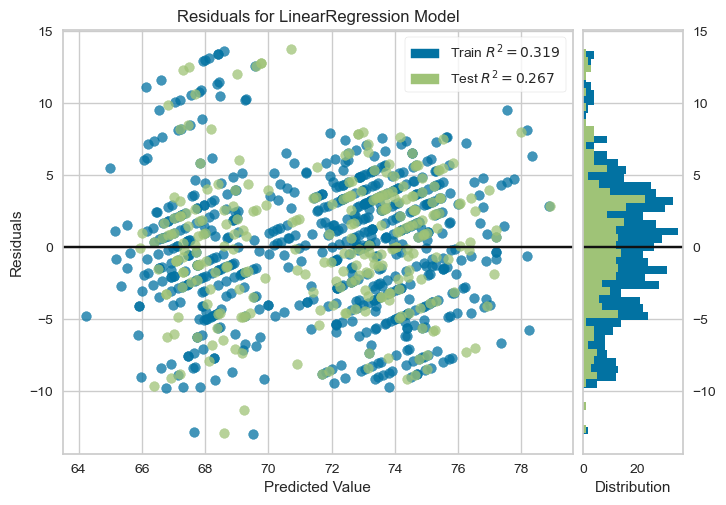

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

hood_chongjang_train_lst[1]


,Description,Value
0,Session id,5750
1,Target,full_length
2,Target type,Regression
3,Original data shape,"(223, 4)"
4,Transformed data shape,"(223, 4)"
5,Transformed train set shape,"(156, 4)"
6,Transformed test set shape,"(67, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,3.5721,19.7390,4.4110,0.3159,0.0663,0.0541,0.0040
lr,Linear Regression,3.5701,19.7700,4.4116,0.3139,0.0663,0.0540,0.0050
lar,Least Angle Regression,3.5701,19.7700,4.4116,0.3139,0.0663,0.0540,0.0050
br,Bayesian Ridge,3.6658,20.9143,4.5426,0.2861,0.0682,0.0556,0.0050
lasso,Lasso Regression,3.6964,21.1490,4.5774,0.2790,0.0688,0.0562,0.0050
llar,Lasso Least Angle Regression,3.6964,21.1490,4.5774,0.2790,0.0688,0.0562,0.0050
en,Elastic Net,3.6992,21.1379,4.5761,0.2781,0.0687,0.0562,0.0040
huber,Huber Regressor,3.6537,20.9144,4.5344,0.2707,0.0683,0.0554,0.0050
knn,K Neighbors Regressor,3.7021,22.2418,4.6710,0.2599,0.0698,0.0561,0.0060
lightgbm,Light Gradient Boosting Machine,3.7915,23.0162,4.7432,0.2472,0.0711,0.0573,0.0150


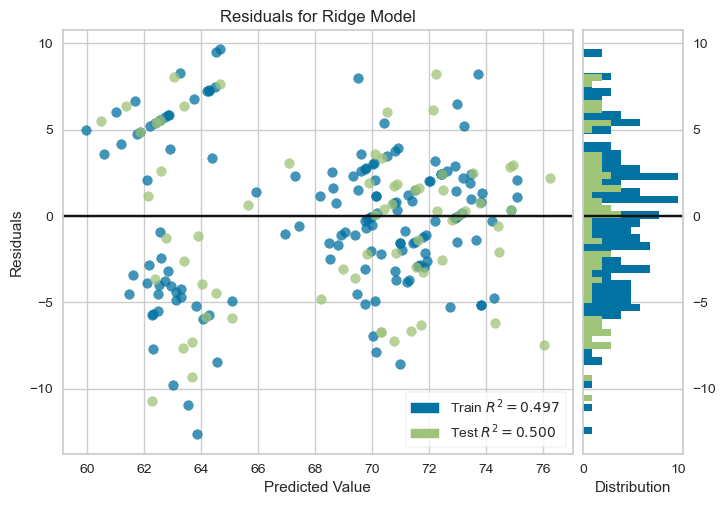

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

hood_chongjang_train_lst[2]


,Description,Value
0,Session id,6207
1,Target,full_length
2,Target type,Regression
3,Original data shape,"(11433, 4)"
4,Transformed data shape,"(11433, 4)"
5,Transformed train set shape,"(8003, 4)"
6,Transformed test set shape,"(3430, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,3.6142,22.9139,4.7841,0.2921,0.0698,0.0530,0.0260
ridge,Ridge Regression,3.6223,22.9946,4.7924,0.2897,0.0700,0.0532,0.0050
lar,Least Angle Regression,3.6224,22.9947,4.7924,0.2897,0.0700,0.0532,0.0040
br,Bayesian Ridge,3.6211,22.9949,4.7925,0.2897,0.0700,0.0532,0.0050
lr,Linear Regression,3.6224,22.9947,4.7924,0.2897,0.0700,0.0532,0.0050
ada,AdaBoost Regressor,3.6461,23.2854,4.8230,0.2804,0.0703,0.0534,0.0090
huber,Huber Regressor,3.5593,23.3846,4.8324,0.2782,0.0708,0.0526,0.0090
lightgbm,Light Gradient Boosting Machine,3.6623,23.4504,4.8396,0.2755,0.0706,0.0537,0.0590
en,Elastic Net,3.5931,23.6428,4.8588,0.2703,0.0711,0.0529,0.0050
lasso,Lasso Regression,3.5878,23.6524,4.8598,0.2700,0.0711,0.0528,0.0050


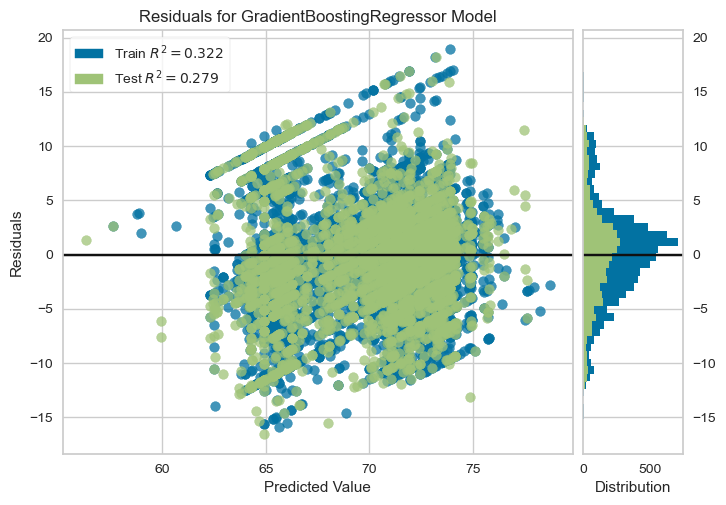

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

hood_shoulder_train_lst[0]


,Description,Value
0,Session id,6063
1,Target,width_length
2,Target type,Regression
3,Original data shape,"(832, 4)"
4,Transformed data shape,"(832, 4)"
5,Transformed train set shape,"(582, 4)"
6,Transformed test set shape,"(250, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,5.6096,45.2703,6.6987,0.0505,0.1230,0.1045,0.0040
llar,Lasso Least Angle Regression,5.6096,45.2703,6.6987,0.0505,0.1230,0.1045,0.0050
en,Elastic Net,5.6104,45.2591,6.6981,0.0504,0.1229,0.1045,0.0050
br,Bayesian Ridge,5.6116,45.2672,6.6986,0.0503,0.1230,0.1046,0.0050
lr,Linear Regression,5.6184,45.3097,6.7023,0.0487,0.1230,0.1046,0.0050
ridge,Ridge Regression,5.6182,45.3085,6.7022,0.0487,0.1230,0.1046,0.0040
lar,Least Angle Regression,5.6184,45.3097,6.7023,0.0487,0.1230,0.1046,0.0040
omp,Orthogonal Matching Pursuit,5.6198,45.3738,6.7069,0.0480,0.1231,0.1047,0.0050
huber,Huber Regressor,5.6314,45.6070,6.7225,0.0449,0.1237,0.1055,0.0070
ada,AdaBoost Regressor,5.7129,46.7555,6.8125,0.0137,0.1239,0.1050,0.0070


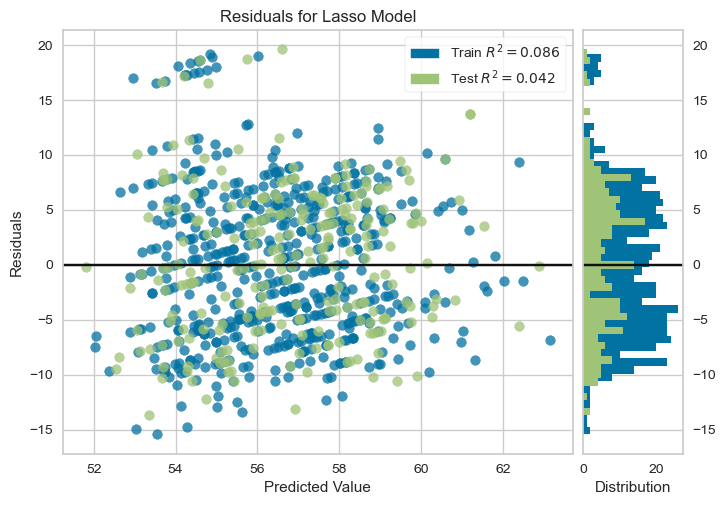

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

hood_shoulder_train_lst[1]


,Description,Value
0,Session id,3362
1,Target,width_length
2,Target type,Regression
3,Original data shape,"(194, 4)"
4,Transformed data shape,"(194, 4)"
5,Transformed train set shape,"(135, 4)"
6,Transformed test set shape,"(59, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,6.6810,60.5596,7.6877,0.1265,0.1522,0.1362,0.0050
lar,Least Angle Regression,6.6884,60.9666,7.7106,0.1186,0.1524,0.1362,0.0040
lr,Linear Regression,6.6884,60.9666,7.7106,0.1186,0.1524,0.1362,0.0050
lightgbm,Light Gradient Boosting Machine,6.7463,62.0900,7.8131,0.1011,0.1548,0.1381,0.0130
ada,AdaBoost Regressor,6.7140,62.5481,7.8339,0.0882,0.1557,0.1383,0.0090
huber,Huber Regressor,6.6194,62.3788,7.7754,0.0879,0.1525,0.1318,0.0060
en,Elastic Net,6.9670,66.1916,8.0388,0.0517,0.1604,0.1434,0.0040
rf,Random Forest Regressor,6.5747,64.5462,7.9466,0.0429,0.1571,0.1346,0.0210
br,Bayesian Ridge,6.9879,67.0649,8.0955,0.0414,0.1617,0.1441,0.0050
lasso,Lasso Regression,7.0137,67.3804,8.1129,0.0344,0.1620,0.1445,0.0050


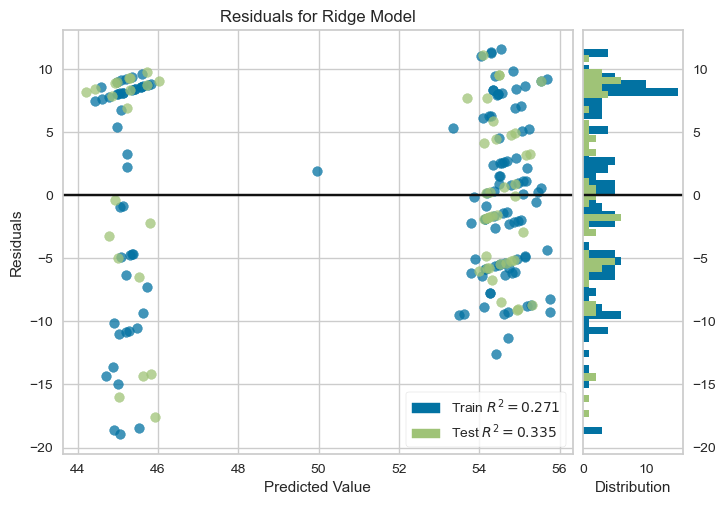

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

hood_shoulder_train_lst[2]


,Description,Value
0,Session id,3855
1,Target,width_length
2,Target type,Regression
3,Original data shape,"(11559, 4)"
4,Transformed data shape,"(11559, 4)"
5,Transformed train set shape,"(8091, 4)"
6,Transformed test set shape,"(3468, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,6.0811,53.8881,7.3374,0.1293,0.1567,0.1178,0.0320
lr,Linear Regression,6.1246,54.3484,7.3675,0.1225,0.1572,0.1188,0.0050
ridge,Ridge Regression,6.1246,54.3484,7.3675,0.1225,0.1572,0.1188,0.0040
lar,Least Angle Regression,6.1246,54.3484,7.3675,0.1225,0.1572,0.1188,0.0060
br,Bayesian Ridge,6.1240,54.3498,7.3676,0.1224,0.1572,0.1188,0.0060
huber,Huber Regressor,6.1007,54.6464,7.3874,0.1180,0.1582,0.1193,0.0100
lightgbm,Light Gradient Boosting Machine,6.0959,54.6606,7.3902,0.1161,0.1575,0.1180,0.0780
en,Elastic Net,6.1171,55.3932,7.4385,0.1056,0.1589,0.1191,0.0050
llar,Lasso Least Angle Regression,6.1136,55.4023,7.4391,0.1055,0.1589,0.1191,0.0060
lasso,Lasso Regression,6.1136,55.4023,7.4391,0.1055,0.1589,0.1191,0.0050


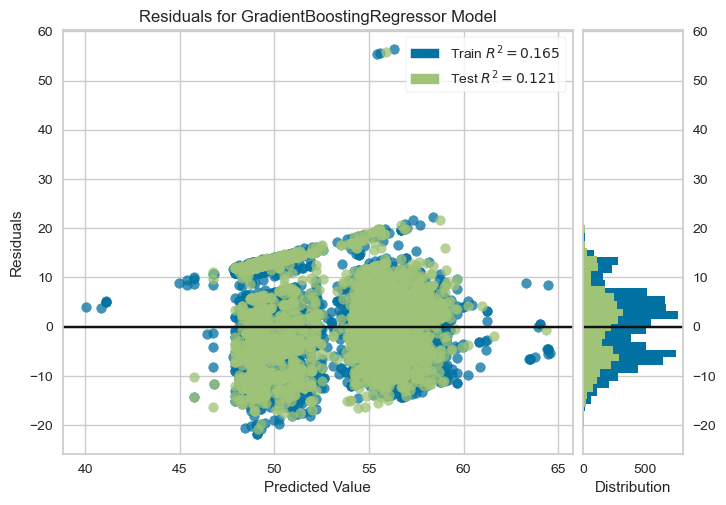

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

hood_chest_train_lst[0]


,Description,Value
0,Session id,4146
1,Target,chest_length
2,Target type,Regression
3,Original data shape,"(835, 4)"
4,Transformed data shape,"(835, 4)"
5,Transformed train set shape,"(584, 4)"
6,Transformed test set shape,"(251, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,4.7870,34.3994,5.8613,0.1603,0.0949,0.0791,0.0050
en,Elastic Net,4.7839,34.4051,5.8618,0.1602,0.0950,0.0791,0.0050
lr,Linear Regression,4.8080,34.4216,5.8621,0.1601,0.0949,0.0795,0.0050
ridge,Ridge Regression,4.8074,34.4190,5.8619,0.1601,0.0949,0.0794,0.0050
lar,Least Angle Regression,4.8080,34.4216,5.8621,0.1601,0.0949,0.0795,0.0040
lasso,Lasso Regression,4.7809,34.4189,5.8630,0.1600,0.0950,0.0790,0.0050
llar,Lasso Least Angle Regression,4.7809,34.4189,5.8630,0.1600,0.0950,0.0790,0.0050
huber,Huber Regressor,4.7908,34.6774,5.8853,0.1542,0.0954,0.0793,0.0060
ada,AdaBoost Regressor,4.9045,35.1939,5.9266,0.1383,0.0957,0.0808,0.0070
omp,Orthogonal Matching Pursuit,4.8656,35.8580,5.9828,0.1272,0.0967,0.0802,0.0040


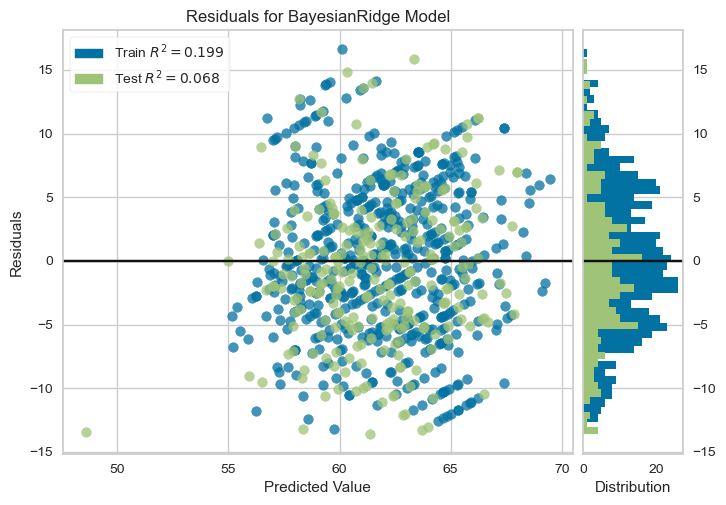

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

hood_chest_train_lst[1]


,Description,Value
0,Session id,8102
1,Target,chest_length
2,Target type,Regression
3,Original data shape,"(175, 4)"
4,Transformed data shape,"(175, 4)"
5,Transformed train set shape,"(122, 4)"
6,Transformed test set shape,"(53, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,6.1876,114.4981,9.3276,-0.1556,0.4223,0.0862,0.0060
br,Bayesian Ridge,6.1871,113.5603,9.3294,-0.1598,0.4217,0.0865,0.0050
huber,Huber Regressor,5.9741,118.4681,9.3380,-0.1606,0.4261,0.0825,0.0060
dummy,Dummy Regressor,6.1930,111.2690,9.3154,-0.1755,0.4212,0.0876,0.0040
lasso,Lasso Regression,6.2116,116.2950,9.4226,-0.1983,0.4256,0.0865,0.0050
llar,Lasso Least Angle Regression,6.2116,116.2968,9.4227,-0.1984,0.4256,0.0865,0.0050
en,Elastic Net,6.2268,117.2344,9.4679,-0.2194,0.4271,0.0868,0.0050
ridge,Ridge Regression,6.2615,120.7749,9.6040,-0.2653,0.4306,0.0867,0.0050
lar,Least Angle Regression,6.2678,121.0178,9.6134,-0.2674,0.4308,0.0868,0.0050
lr,Linear Regression,6.2678,121.0178,9.6134,-0.2674,0.4308,0.0868,0.0050


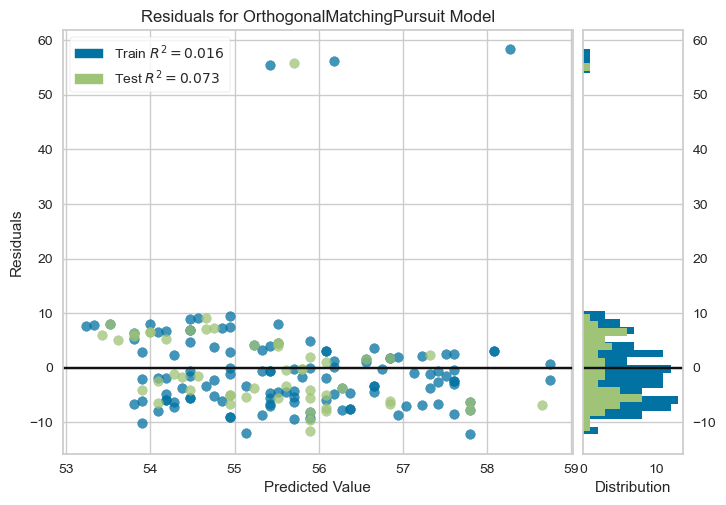

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

hood_chest_train_lst[2]


,Description,Value
0,Session id,428
1,Target,chest_length
2,Target type,Regression
3,Original data shape,"(11575, 4)"
4,Transformed data shape,"(11575, 4)"
5,Transformed train set shape,"(8102, 4)"
6,Transformed test set shape,"(3473, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,5.7082,94.4947,9.6443,0.0467,0.5328,0.0812,0.0060
ridge,Ridge Regression,5.7082,94.4947,9.6443,0.0467,0.5328,0.0812,0.0060
lar,Least Angle Regression,5.7082,94.4947,9.6443,0.0467,0.5328,0.0812,0.0050
br,Bayesian Ridge,5.7079,94.5015,9.6447,0.0466,0.5328,0.0812,0.0050
en,Elastic Net,5.7212,94.8282,9.6621,0.0431,0.5326,0.0816,0.0060
lasso,Lasso Regression,5.7225,94.8383,9.6628,0.0429,0.5326,0.0817,0.0050
llar,Lasso Least Angle Regression,5.7225,94.8383,9.6628,0.0429,0.5326,0.0817,0.0050
gbr,Gradient Boosting Regressor,5.7412,95.1288,9.6818,0.0383,0.5323,0.0818,0.0270
huber,Huber Regressor,5.5981,95.6752,9.6994,0.0367,0.5352,0.0803,0.0100
omp,Orthogonal Matching Pursuit,5.7782,96.0245,9.7242,0.0305,0.5329,0.0827,0.0060


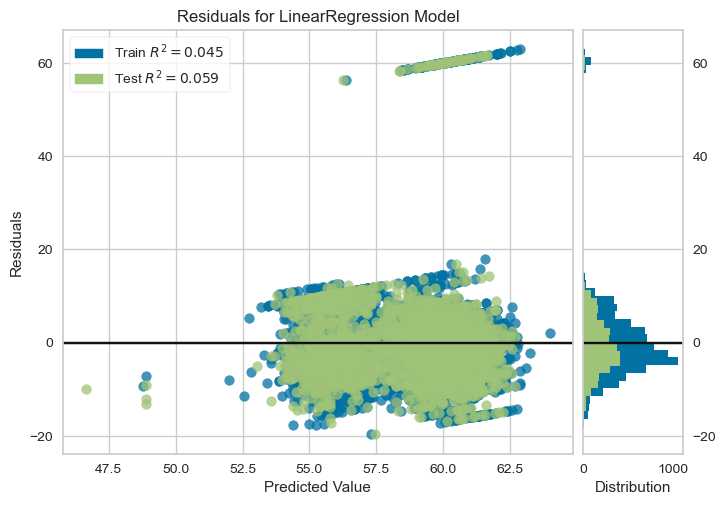

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

hood_arm_train_lst[0]


,Description,Value
0,Session id,5864
1,Target,sleeve_length
2,Target type,Regression
3,Original data shape,"(859, 4)"
4,Transformed data shape,"(859, 4)"
5,Transformed train set shape,"(601, 4)"
6,Transformed test set shape,"(258, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,10.6813,206.7807,14.2805,-0.0310,0.3631,0.3258,0.0050
dummy,Dummy Regressor,10.6617,207.0941,14.2870,-0.0312,0.3634,0.3257,0.0050
br,Bayesian Ridge,10.7072,207.3497,14.3037,-0.0352,0.3637,0.3266,0.0050
lr,Linear Regression,10.7098,207.4170,14.3117,-0.0384,0.3636,0.3262,0.0050
ridge,Ridge Regression,10.7098,207.4107,14.3116,-0.0384,0.3636,0.3262,0.0050
lasso,Lasso Regression,10.7201,207.6724,14.3216,-0.0401,0.3640,0.3268,0.0050
lar,Least Angle Regression,10.7130,207.5855,14.3191,-0.0401,0.3637,0.3262,0.0040
llar,Lasso Least Angle Regression,10.7201,207.6724,14.3216,-0.0401,0.3640,0.3268,0.0050
en,Elastic Net,10.7198,207.6687,14.3221,-0.0404,0.3640,0.3268,0.0050
huber,Huber Regressor,8.3773,232.9800,15.0925,-0.1400,0.3854,0.3135,0.0070


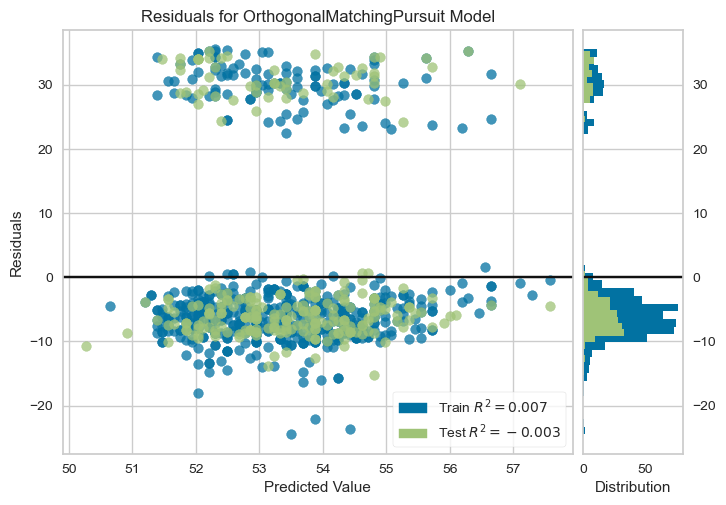

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

hood_arm_train_lst[1]


,Description,Value
0,Session id,6005
1,Target,sleeve_length
2,Target type,Regression
3,Original data shape,"(189, 4)"
4,Transformed data shape,"(189, 4)"
5,Transformed train set shape,"(132, 4)"
6,Transformed test set shape,"(57, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,18.5978,401.3573,19.9613,-0.1044,0.5379,0.6186,0.0050
lar,Least Angle Regression,18.5978,401.3573,19.9613,-0.1044,0.5379,0.6186,0.0050
ridge,Ridge Regression,18.6789,402.0584,19.9851,-0.1065,0.5391,0.6215,0.0050
omp,Orthogonal Matching Pursuit,19.4216,408.7887,20.1414,-0.1118,0.5465,0.6569,0.0050
knn,K Neighbors Regressor,17.5300,402.5240,19.9894,-0.1136,0.5358,0.5906,0.0060
dummy,Dummy Regressor,19.5867,412.1955,20.2501,-0.1154,0.5514,0.6670,0.0040
br,Bayesian Ridge,19.6727,418.0082,20.3999,-0.1377,0.5529,0.6652,0.0050
ada,AdaBoost Regressor,19.0740,422.9579,20.5069,-0.1667,0.5427,0.6193,0.0070
en,Elastic Net,19.5031,425.1586,20.5414,-0.1725,0.5701,0.6526,0.0050
lightgbm,Light Gradient Boosting Machine,18.7752,423.3542,20.4720,-0.1739,0.5501,0.6227,0.0130


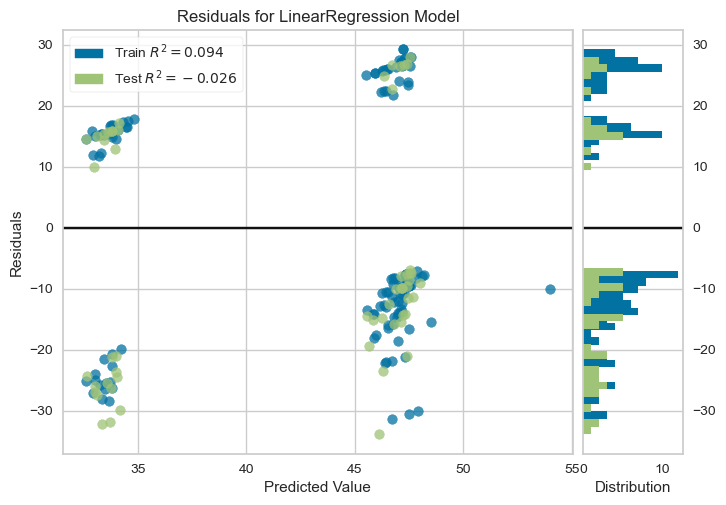

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

hood_arm_train_lst[2]


,Description,Value
0,Session id,8519
1,Target,sleeve_length
2,Target type,Regression
3,Original data shape,"(11537, 4)"
4,Transformed data shape,"(11537, 4)"
5,Transformed train set shape,"(8075, 4)"
6,Transformed test set shape,"(3462, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,15.6769,315.0061,17.7456,0.0374,0.4665,0.4989,0.0050
ridge,Ridge Regression,15.6771,315.0059,17.7456,0.0374,0.4665,0.4989,0.0050
lar,Least Angle Regression,15.6769,315.0061,17.7456,0.0374,0.4665,0.4989,0.0050
br,Bayesian Ridge,15.6835,315.0183,17.7459,0.0374,0.4665,0.4991,0.0050
gbr,Gradient Boosting Regressor,15.6434,316.3225,17.7827,0.0333,0.4668,0.4978,0.0290
ada,AdaBoost Regressor,16.1873,317.2234,17.8089,0.0304,0.4628,0.4969,0.0090
en,Elastic Net,15.8344,317.9254,17.8269,0.0288,0.4694,0.5053,0.0050
llar,Lasso Least Angle Regression,15.8420,318.0723,17.8310,0.0283,0.4695,0.5056,0.0060
lasso,Lasso Regression,15.8420,318.0723,17.8310,0.0283,0.4695,0.5056,0.0050
omp,Orthogonal Matching Pursuit,15.9536,320.9724,17.9124,0.0194,0.4716,0.5097,0.0050


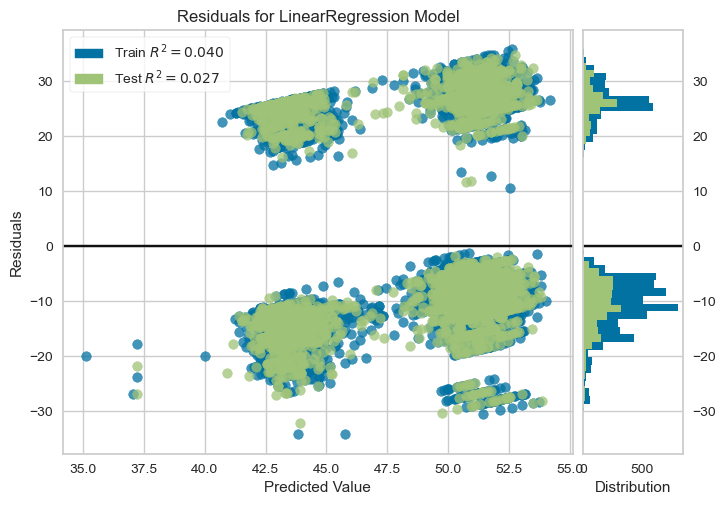

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

MSE of big full_length's Model : 21.698889922359097
MSE of small full_length's Model : 24.51237862312121
MSE of soso full_length's Model : 22.96893819369854
------------------ chongjang lr_trainModel:done
MSE of big width_length's Model : 46.323616527938825
MSE of small width_length's Model : 63.290208328181215
MSE of soso width_length's Model : 53.643302874256726
------------------ shoulder lr_trainModel:done
MSE of big chest_length's Model : 30.89047510791966
MSE of small chest_length's Model : 45.44753193456044
MSE of soso chest_length's Model : 94.11727457002756
------------------ chest lr_trainModel:done
MSE of big sleeve_length's Model : 219.67503907673753
MSE of small sleeve_length's Model : 398.5982062821951
MSE of soso sleeve_length's Model : 319.0702538413525
------------------ arm lr_trainModel:done
Best estimator GradientBoostingRegressor(learning_rate=0.01, max_depth=2, n_estimators=300,
                          random_state=42, subsample=0.2)
score:0.2734
MSE of big full

In [15]:
if __name__=='__main__':

    hood_chongjang_train_lst, hood_shoulder_train_lst, hood_chest_train_lst, hood_arm_train_lst = preprocessing(df_filled)

    # Pycaret
    pycaret(hood_chongjang_train_lst, hood_shoulder_train_lst, hood_chest_train_lst, hood_arm_train_lst)

    ## Train model
    #Linear Regressor
    lr_trainModel(hood_chongjang_train_lst, 'chongjang')
    lr_trainModel(hood_shoulder_train_lst, 'shoulder')
    lr_trainModel(hood_chest_train_lst, 'chest')
    lr_trainModel(hood_arm_train_lst, 'arm')
    #Gradient Boosting Regressor
    gbr_trainModel(hood_chongjang_train_lst, 'chongjang')
    gbr_trainModel(hood_shoulder_train_lst, 'shoulder')
    gbr_trainModel(hood_chest_train_lst, 'chest')
    gbr_trainModel(hood_arm_train_lst, 'arm')

    # Decide Weight
    chongjang_weight = decide_weight(hood_chongjang_train_lst, 'chongjang')
    chest_weight = decide_weight(hood_chest_train_lst, 'chest')
    shoulder_weight = decide_weight(hood_shoulder_train_lst, 'shoulder')
    arm_weight = decide_weight(hood_arm_train_lst, 'arm')

    with open('weight.pkl', 'wb') as f:
        pickle.dump([chongjang_weight, chest_weight, shoulder_weight, arm_weight], f)